# Data Loading and Exploration

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

print("All libraries imported successfully!")

All libraries imported successfully!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Netflix-Title-Analysis/netflix_titles.csv')

print("DATASET OVERVIEW")
print("=" * 80)
print(f"Shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nData Types:\n{df.dtypes}")
print(f"\nFirst 5 rows:")
print(df.head())

DATASET OVERVIEW
Shape: (8807, 12)

Columns: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']

Data Types:
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

First 5 rows:
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN 

In [ ]:
print("\nDATA QUALITY ASSESSMENT")
print("=" * 80)
print(f"\nMissing Values:")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
quality_df = pd.DataFrame({
    'Column': missing.index,
    'Missing_Count': missing.values,
    'Missing_Percentage': missing_pct.values
}).sort_values('Missing_Count', ascending=False)
print(quality_df[quality_df['Missing_Count'] > 0])

print(f"\nDuplicate Rows: {df.duplicated().sum()}")
print(f"Total Records: {len(df)}")


DATA QUALITY ASSESSMENT

Missing Values:
       Column  Missing_Count  Missing_Percentage
3    director           2634           29.908028
5     country            831            9.435676
4        cast            825            9.367549
6  date_added             10            0.113546
8      rating              4            0.045418
9    duration              3            0.034064

Duplicate Rows: 0
Total Records: 8807


In [ ]:
print("\nSUMMARY STATISTICS")
print("=" * 80)
print(df.describe())


SUMMARY STATISTICS
       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


In [ ]:
print("\nUNIQUE VALUES")
print("=" * 80)
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count} unique values")
    if unique_count <= 15:
        print(f"  Values: {df[col].unique()}")


UNIQUE VALUES
show_id: 8807 unique values
type: 2 unique values
  Values: ['Movie' 'TV Show']
title: 8807 unique values
director: 4528 unique values
cast: 7692 unique values
country: 748 unique values
date_added: 1767 unique values
release_year: 74 unique values
rating: 17 unique values
duration: 220 unique values
listed_in: 514 unique values
description: 8775 unique values


# Data Cleaning

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/Netflix-Title-Analysis/netflix_titles.csv')

In [ ]:
# Handle Missing Values

text_cols = ['director', 'cast', 'country']
for col in text_cols:
    if col in df.columns:
        missing_count = df[col].isnull().sum()
        df[col] = df[col].fillna('Unknown')
        print(f"{col}: {missing_count} filled")

if 'date_added' in df.columns:
    df['date_added'] = df['date_added'].fillna('Not Available')
    print("date_added: filled")

if 'rating' in df.columns:
    df['rating'] = df['rating'].fillna('Unrated')
    print("rating: filled")

print("Step 1 complete!\n")

director: 0 filled
cast: 0 filled
country: 0 filled
date_added: filled
rating: filled
Step 1 complete!



In [ ]:
# Clean Duration

if 'duration' in df.columns and 'type' in df.columns:
    def fix_duration(row):
        if pd.isna(row['duration']) or row['duration'] == '':
            if row['type'] == 'Movie':
                return f"{np.random.randint(85, 140)} min"
            else:
                return "1 Season"
        return row['duration']

    df['duration'] = df.apply(fix_duration, axis=1)
    print("Duration fixed for all rows")
print("Step 2 complete!\n")


Duration fixed for all rows
Step 2 complete!



In [ ]:
# Standardize Date Format

if 'date_added' in df.columns:
    def clean_date(date_str):
        if date_str == 'Not Available':
            return date_str
        try:
            return pd.to_datetime(date_str).strftime('%Y-%m-%d')
        except:
            return 'Not Available'

    df['date_added'] = df['date_added'].apply(clean_date)
    print("Dates standardized")
print("Step 3 complete!\n")

Dates standardized
Step 3 complete!



In [ ]:
# Process Genres

if 'listed_in' in df.columns:
    df['genres_list'] = df['listed_in'].apply(
        lambda x: [g.strip() for g in str(x).split(',')] if pd.notna(x) else []
    )
    df['genre_count'] = df['genres_list'].apply(len)
    df['primary_genre'] = df['genres_list'].apply(lambda x: x[0] if x else 'Unknown')
    print("Genres processed")
print("Step 4 complete!\n")


Genres processed
Step 4 complete!



In [ ]:
# Remove Duplicates

initial_rows = len(df)
if 'show_id' in df.columns:
    df = df.drop_duplicates(subset=['show_id'], keep='first')
else:
    df = df.drop_duplicates()
removed = initial_rows - len(df)
print(f"Removed {removed} duplicates")
print("Step 5 complete!\n")


Removed 0 duplicates
Step 5 complete!



In [ ]:
# Validate Data

if 'release_year' in df.columns:
    df = df[(df['release_year'] >= 1900) & (df['release_year'] <= 2025)]
    print("Invalid years removed")

if 'type' in df.columns:
    df = df[df['type'].isin(['Movie', 'TV Show'])]
    print("Invalid types removed")

print(f"FINAL DATASET: {df.shape[0]} rows, {df.shape[1]} columns\n")


Invalid years removed
Invalid types removed
FINAL DATASET: 8807 rows, 15 columns



In [ ]:
# Save cleaned data

df.to_csv('/content/drive/MyDrive/Netflix-Title-Analysis/netflix_cleaned.csv', index=False)
print("\nSAVED: netflix_cleaned.csv")


SAVED: netflix_cleaned.csv


# Feature Engineering

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

df = pd.read_csv('/content/drive/MyDrive/Netflix-Title-Analysis/netflix_cleaned.csv')

In [ ]:
# Create freshness features

if 'date_added' in df.columns and 'release_year' in df.columns:
    df['date_added_parsed'] = pd.to_datetime(df['date_added'], errors='coerce')
    df['years_to_platform'] = df['date_added_parsed'].dt.year - df['release_year']

    def categorize_freshness(years):
        if pd.isna(years):
            return 'Unknown'
        elif years <= 0.5:
            return 'Ultra Fresh'
        elif years <= 1:
            return 'Fresh'
        elif years <= 3:
            return 'Recent Catalog'
        else:
            return 'Classic'
    df['freshness_category'] = df['years_to_platform'].apply(categorize_freshness)
    df['year_added'] = df['date_added_parsed'].dt.year
    df['month_added'] = df['date_added_parsed'].dt.month
    print("Freshness features created")

Freshness features created


In [ ]:
# Create duration features

if 'duration' in df.columns:
    def extract_duration_value(dur_str):
        if pd.isna(dur_str) or dur_str == 'Unknown':
            return np.nan
        try:
            return int(''.join(filter(str.isdigit, str(dur_str).split())))
        except:
            return np.nan
    df['duration_value'] = df['duration'].apply(extract_duration_value)

    def categorize_movie_length(duration, content_type):
        if content_type == 'TV Show' or pd.isna(duration):
            return np.nan
        elif duration < 30:
            return 'Short'
        elif duration <= 90:
            return 'Medium'
        else:
            return 'Long'
    df['movie_length_category'] = df.apply(
        lambda row: categorize_movie_length(row['duration_value'], row.get('type', 'Movie')), # row.get(key, default) -> if key is present, it returns row[key] otherwise default
        axis=1
    )
    print("Duration features created")


Duration features created


In [ ]:
# 3. Create diversity features

if 'listed_in' in df.columns:
    df['genres_list'] = df['listed_in'].fillna('').apply(lambda x: [g.strip() for g in x.split(',')] if x else [])
    df['primary_genre'] = df['genres_list'].apply(lambda x: x[0] if x else 'Unknown')
    df['is_multi_genre'] = df['genres_list'].apply(lambda x: len(x) > 1)
    print("Diversity features created")


Diversity features created


In [ ]:
# Create rating features
if 'rating' in df.columns:
    rating_categories = {
        'G': 'Family', 'PG': 'Family', 'PG-13': 'Teen',
        'R': 'Mature', 'NC-17': 'Adult',
        'TV-Y': 'Kids', 'TV-Y7': 'Kids', 'TV-G': 'Family',
        'TV-PG': 'Family', 'TV-14': 'Teen', 'TV-MA': 'Mature',
        'Unrated': 'Unknown'
    }
    df['audience_segment'] = df['rating'].map(rating_categories).fillna('Unknown')
    print("Rating features created")

Rating features created


In [ ]:
# 5. Create geographic features

if 'country' in df.columns:
    df['countries_list'] = df['country'].fillna('Unknown').apply(lambda x: [c.strip() for c in x.split(',')] if x != 'Unknown' else [])
    df['primary_country'] = df['countries_list'].apply(lambda x: x[0] if x else 'Unknown')
    df['is_international'] = df['countries_list'].apply(lambda x: len(x) > 1)
    df['is_us_content'] = df['countries_list'].apply(lambda x: 'United States' in x)
    print("Geographic features created")


Geographic features created


In [ ]:
# Create recency features

current_year = datetime.now().year
if 'release_year' in df.columns:
    df['years_since_release'] = current_year - df['release_year']
    def categorize_recency(years):
        if years <= 2:
            return 'Very Recent'
        elif years <= 5:
            return 'Recent'
        elif years <= 10:
            return 'Moderately Recent'
        else:
            return 'Classic'
    df['recency_category'] = df['years_since_release'].apply(categorize_recency)
    print("Recency features created")

print("Feature engineering complete")

Recency features created
Feature engineering complete


In [ ]:
df.to_csv('/content/drive/MyDrive/Netflix-Title-Analysis/netflix_features.csv', index=False)
print("\nSAVED: netflix_features.csv")


SAVED: netflix_features.csv


# EDA & Univariate Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

df = pd.read_csv('/content/drive/MyDrive/Netflix-Title-Analysis/netflix_features.csv')

# Netflix color scheme
NETFLIX_RED = '#E50914'
NETFLIX_GRAY = '#564d4d'
NETFLIX_ORANGE = '#FF6B35'

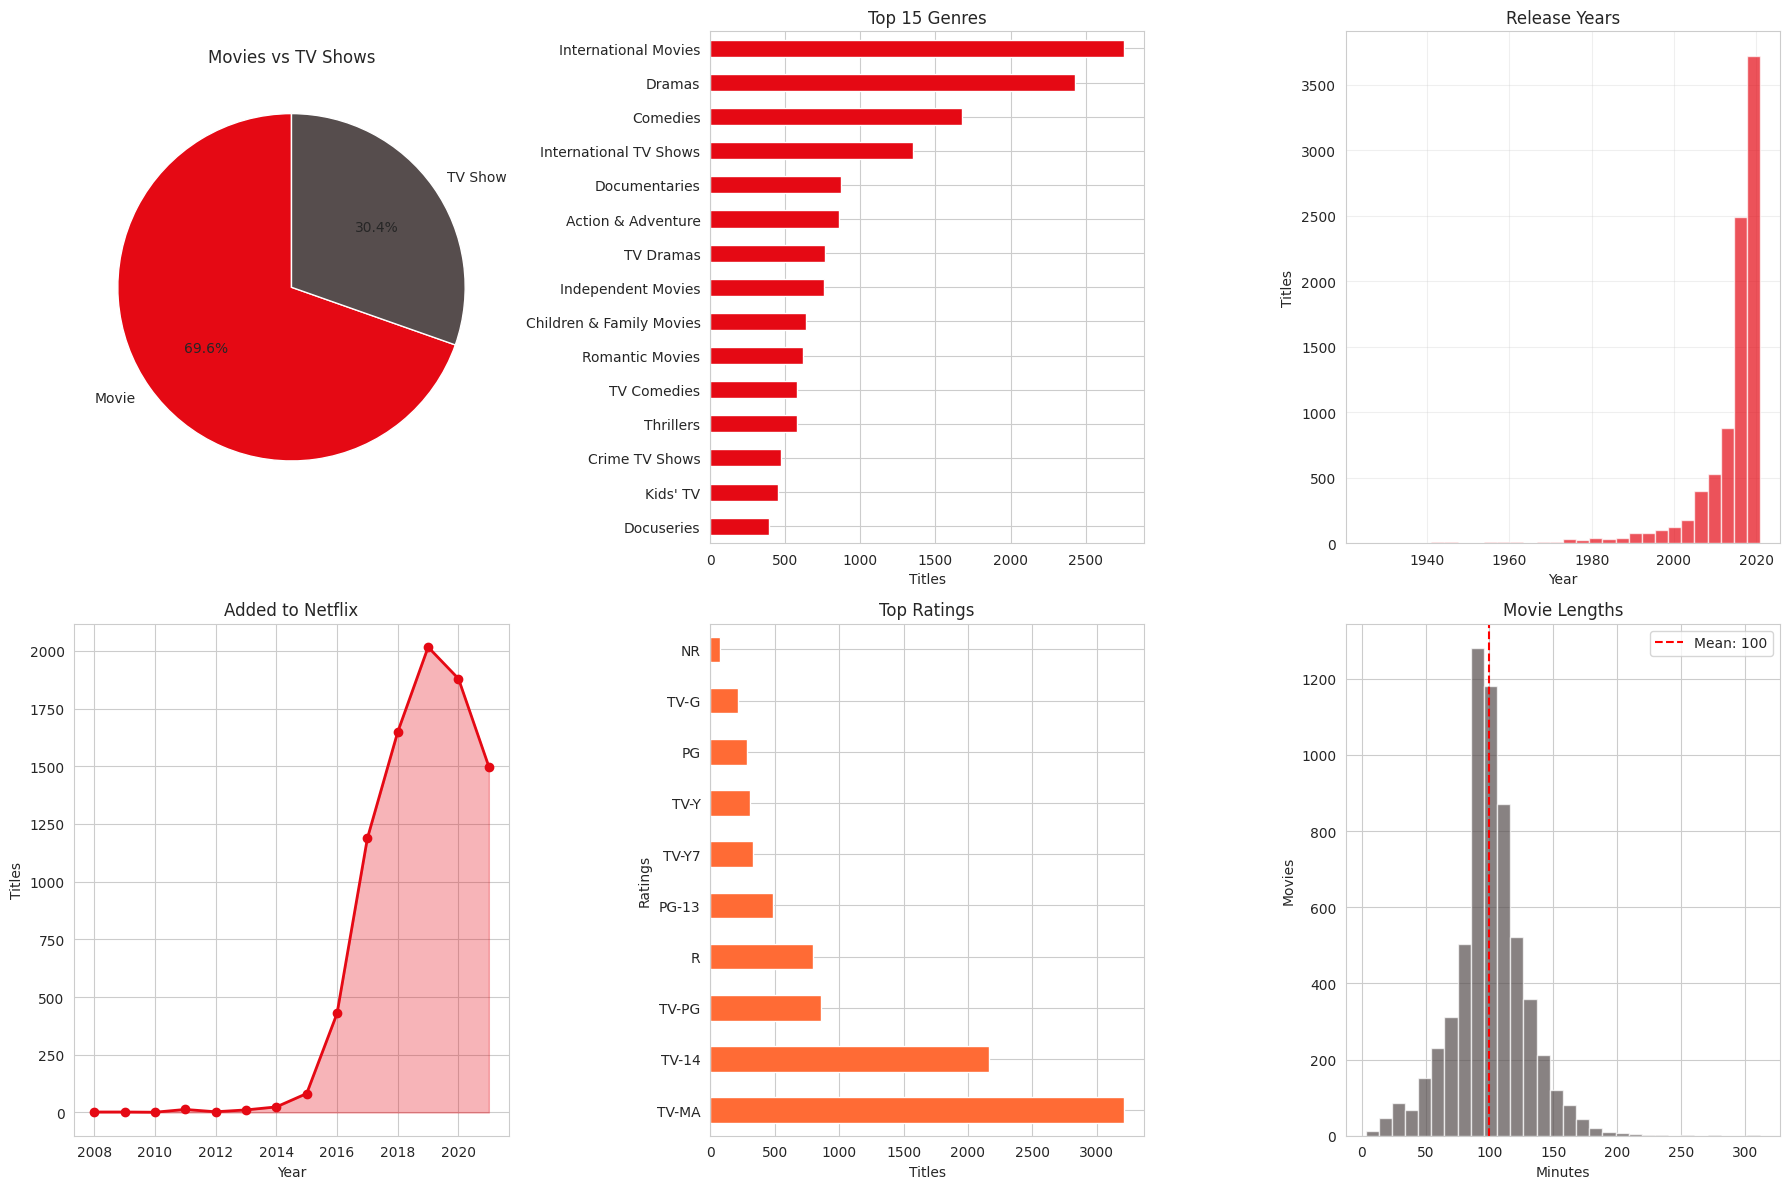

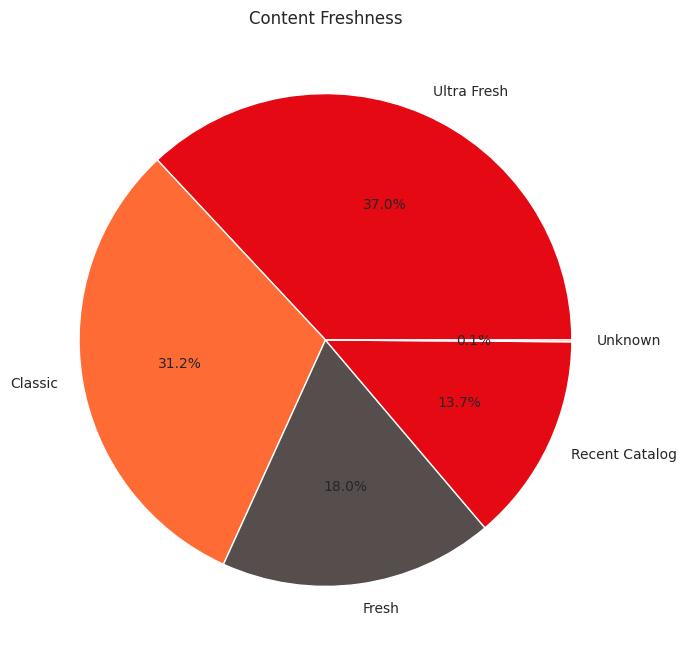

Freshness pie saved!

KEY STATS:
Total: 8,807
Movies: 6,131 (69.6%)
TV Shows: 2,676
Years span: 1925 - 2021
Avg movie length: 100 min
Genres: 42
UNIVARIATE ANALYSIS COMPLETE!


In [ ]:
# 1. MOVIE vs TV SHOW (Pie + Bar)
fig, axes = plt.subplots(2, 3, figsize=(18, 12), squeeze=False)
type_counts = df['type'].value_counts()

axes[0,0].pie(type_counts, labels=type_counts.index, autopct='%1.1f%%',
              colors=[NETFLIX_RED, NETFLIX_GRAY], startangle=90)
axes[0,0].set_title('Movies vs TV Shows')

# 2. TOP 15 GENRES
all_genres = []
for genres in df['genres_list']:
    if isinstance(genres, str):
        genres = ast.literal_eval(genres)  # Convert string -> list
    if isinstance(genres, list):
        all_genres.extend(genres)
genre_counts = pd.Series(all_genres).value_counts().head(15)

genre_counts.plot(kind='barh', ax=axes[0,1], color=NETFLIX_RED)
axes[0,1].set_xlabel('Titles')
axes[0,1].set_title('Top 15 Genres')
axes[0,1].invert_yaxis()

# 3. RELEASE YEAR HISTOGRAM
axes[0,2].hist(df['release_year'].dropna(), bins=30, color=NETFLIX_RED, alpha=0.7)
axes[0,2].set_xlabel('Year')
axes[0,2].set_ylabel('Titles')
axes[0,2].set_title('Release Years')
axes[0,2].grid(True, alpha=0.3)

# 4. CONTENT ADDITION TIMELINE
if 'year_added' in df.columns:
    year_counts = df['year_added'].value_counts().sort_index()
    axes[1,0].plot(year_counts.index, year_counts.values, 'o-', color=NETFLIX_RED, linewidth=2)
    axes[1,0].fill_between(year_counts.index, year_counts.values, alpha=0.3, color=NETFLIX_RED)
    axes[1,0].set_title('Added to Netflix')
    axes[1,0].set_xlabel('Year')
    axes[1,0].set_ylabel('Titles')
    axes[1,0].grid(True)

# 5. RATINGS DISTRIBUTION
rating_counts = df['rating'].value_counts().head(10)
rating_counts.plot(kind='barh', ax=axes[1,1], color=NETFLIX_ORANGE)
axes[1,1].set_xlabel('Titles')
axes[1,1].set_ylabel('Ratings')
axes[1,1].set_title('Top Ratings')

# 6. MOVIE DURATIONS (only movies)
if 'duration_value' in df.columns:
    movies = df[df['type'] == 'Movie']['duration_value'].dropna()
    axes[1,2].hist(movies, bins=30, color=NETFLIX_GRAY, alpha=0.7)
    axes[1,2].axvline(movies.mean(), color='red', linestyle='--', label=f'Mean: {movies.mean():.0f}')
    axes[1,2].set_xlabel('Minutes')
    axes[1,2].set_ylabel('Movies')
    axes[1,2].set_title('Movie Lengths')
    axes[1,2].legend()

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Netflix-Title-Analysis/univariate_summary.png', dpi=300, bbox_inches='tight')
plt.show()


# 7. FRESHNESS PIE
if 'freshness_category' in df.columns:
    plt.figure(figsize=(8, 8))
    freshness_counts = df['freshness_category'].value_counts()
    plt.pie(freshness_counts, labels=freshness_counts.index, autopct='%1.1f%%',
            colors=[NETFLIX_RED, NETFLIX_ORANGE, NETFLIX_GRAY])
    plt.title('Content Freshness')
    plt.savefig('/content/drive/MyDrive/Netflix-Title-Analysis/freshness_pie.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("Freshness pie saved!")

# QUICK STATS
print("\nKEY STATS:")
print(f"Total: {len(df):,}")
print(f"Movies: {(df['type']=='Movie').sum():,} ({(df['type']=='Movie').mean()*100:.1f}%)")
print(f"TV Shows: {(df['type']=='TV Show').sum():,}")
print(f"Years span: {df['release_year'].min():.0f} - {df['release_year'].max():.0f}")
print(f"Avg movie length: {df[df['type']=='Movie']['duration_value'].mean():.0f} min")
print(f"Genres: {len(set(all_genres))}")
print("UNIVARIATE ANALYSIS COMPLETE!")


# EDA & Bivariate Analysis

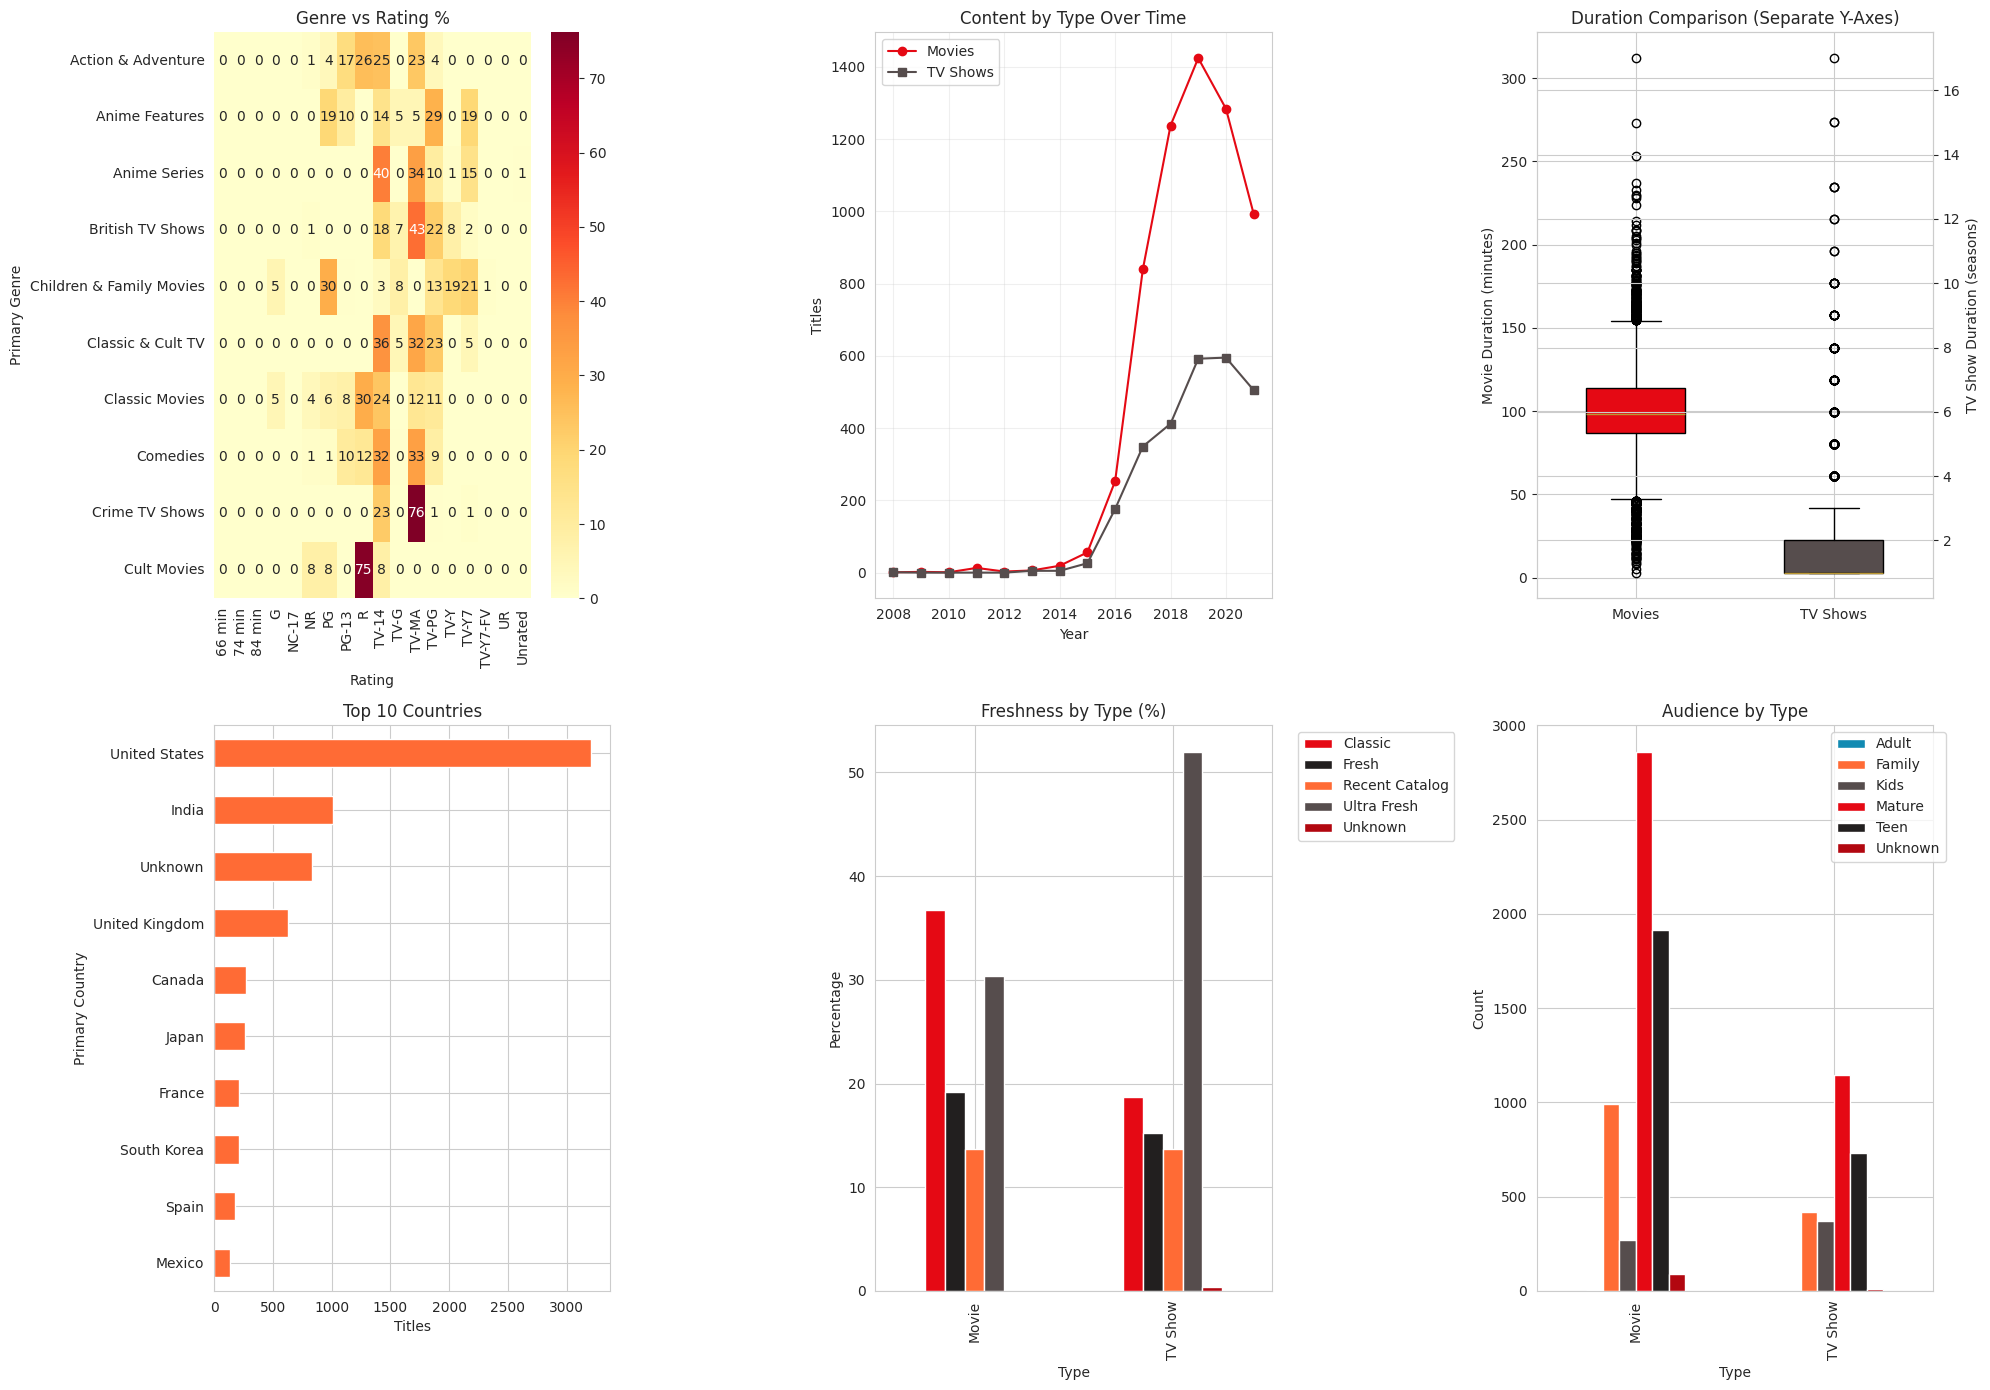


BIVARIATE INSIGHTS:
Top country: United States
US content: 41.9%
Multi-genre titles: 77.1%
BIVARIATE ANALYSIS COMPLETE!


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Netflix colors
NETFLIX_RED = '#E50914'
NETFLIX_GRAY = '#564D4D'
NETFLIX_ORANGE = '#FF6B35'
NETFLIX_BLACK = '#221F1F'
NETFLIX_BLUE = '#118AB2'
NETFLIX_DARK_RED = '#B20710'

fig, axes = plt.subplots(2, 3, figsize=(20, 14))

# 1. GENRE vs RATING HEATMAP
if 'primary_genre' in df.columns and 'rating' in df.columns:
    cross_tab = pd.crosstab(df['primary_genre'], df['rating'], normalize='index') * 100 # normalize converts counts into percentage (eg. 0.45). That's why we have to multiply by 100
    sns.heatmap(cross_tab.iloc[:10], annot=True, fmt='.0f', cmap='YlOrRd', ax=axes[0,0])
    axes[0,0].set_title('Genre vs Rating %')
    axes[0,0].set_xlabel('Rating')
    axes[0,0].set_ylabel('Primary Genre')
else:
    axes[0,0].text(0.5, 0.5, 'No genre/rating data', ha='center', va='center')
    axes[0,0].set_title('Genre vs Rating')

# 2. TYPE OVER TIME
if 'year_added' in df.columns and 'type' in df.columns:
    type_by_year = df.groupby(['year_added', 'type']).size().unstack(fill_value=0)
    axes[0,1].plot(type_by_year.index, type_by_year['Movie'], 'o-', label='Movies', color=NETFLIX_RED)
    axes[0,1].plot(type_by_year.index, type_by_year['TV Show'], 's-', label='TV Shows', color=NETFLIX_GRAY)
    axes[0,1].set_title('Content by Type Over Time')
    axes[0,1].set_xlabel('Year')
    axes[0,1].set_ylabel('Titles')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)

# 3. MOVIE DURATIONS BY TYPE
if 'duration_value' in df.columns and 'type' in df.columns:
    movies = df[df['type']=='Movie']['duration_value'].dropna()
    tv = df[df['type']=='TV Show']['duration_value'].dropna()

    # Create primary axis
    ax1 = axes[0,2]

    # Create secondary y-axis
    ax2 = ax1.twinx()

    # Boxplot for Movies (left axis)
    bp1 = ax1.boxplot(
        movies,
        positions=[1],
        widths=0.5,
        patch_artist=True
    )
    bp1['boxes'][0].set_facecolor(NETFLIX_RED)

    # Boxplot for TV Shows (right axis)
    bp2 = ax2.boxplot(
        tv,
        positions=[2],
        widths=0.5,
        patch_artist=True
    )
    bp2['boxes'][0].set_facecolor(NETFLIX_GRAY)

    # Set labels
    ax1.set_xticks([1, 2])
    ax1.set_xticklabels(['Movies', 'TV Shows'])
    ax1.set_ylabel('Movie Duration (minutes)')
    ax2.set_ylabel('TV Show Duration (seasons)')
    ax1.set_title('Duration Comparison (Separate Y-Axes)')

# 4. TOP COUNTRIES
if 'primary_country' in df.columns:
    top_countries = df['primary_country'].value_counts().head(10)
    top_countries.plot(kind='barh', ax=axes[1,0], color=NETFLIX_ORANGE)
    axes[1,0].set_title('Top 10 Countries')
    axes[1,0].set_xlabel('Titles')
    axes[1,0].set_ylabel('Primary Country')
    axes[1,0].invert_yaxis()

# 5. FRESHNESS BY TYPE
if 'freshness_category' in df.columns and 'type' in df.columns:
    freshness_type = pd.crosstab(df['type'], df['freshness_category'], normalize='index') * 100
    freshness_type.plot(kind='bar', ax=axes[1,1], color=[NETFLIX_RED, NETFLIX_BLACK, NETFLIX_ORANGE, NETFLIX_GRAY, NETFLIX_DARK_RED])
    axes[1,1].set_title('Freshness by Type (%)')
    axes[1,1].set_ylabel('Percentage')
    axes[1,1].set_xlabel('Type')
    axes[1,1].legend(bbox_to_anchor=(1.05, 1))

# 6. AUDIENCE BY TYPE
if 'audience_segment' in df.columns and 'type' in df.columns:
    segment_type = pd.crosstab(df['type'], df['audience_segment'])
    segment_type.plot(kind='bar', ax=axes[1,2], color=[NETFLIX_BLUE, NETFLIX_ORANGE, NETFLIX_GRAY, NETFLIX_RED, NETFLIX_BLACK, NETFLIX_DARK_RED])
    axes[1,2].set_title('Audience by Type')
    axes[1,2].set_ylabel('Count')
    axes[1,2].set_xlabel('Type')
    axes[1,2].legend(bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Netflix-Title-Analysis/bivariate_summary.png', dpi=300, bbox_inches='tight')
plt.show()

# QUICK BIVARIATE INSIGHTS
print("\nBIVARIATE INSIGHTS:")
print(f"Top country: {df['primary_country'].value_counts().index[0]}")
print(f"US content: {(df['is_us_content'].mean()*100):.1f}%")
print(f"Multi-genre titles: {(df['is_multi_genre'].mean()*100):.1f}%")
print("BIVARIATE ANALYSIS COMPLETE!")


# Advanced Analytics & Insights

FRESHNESS INDEX: 65.1/100
  Movies: 60.8
  TV Shows: 74.9
GENRE DIVERSITY: 0.908 (vs industry 0.42)
  Top genre: Dramas
RECENT GROWTH: 42.2%/year
  Peak year: 2019.0 (2,016 titles)


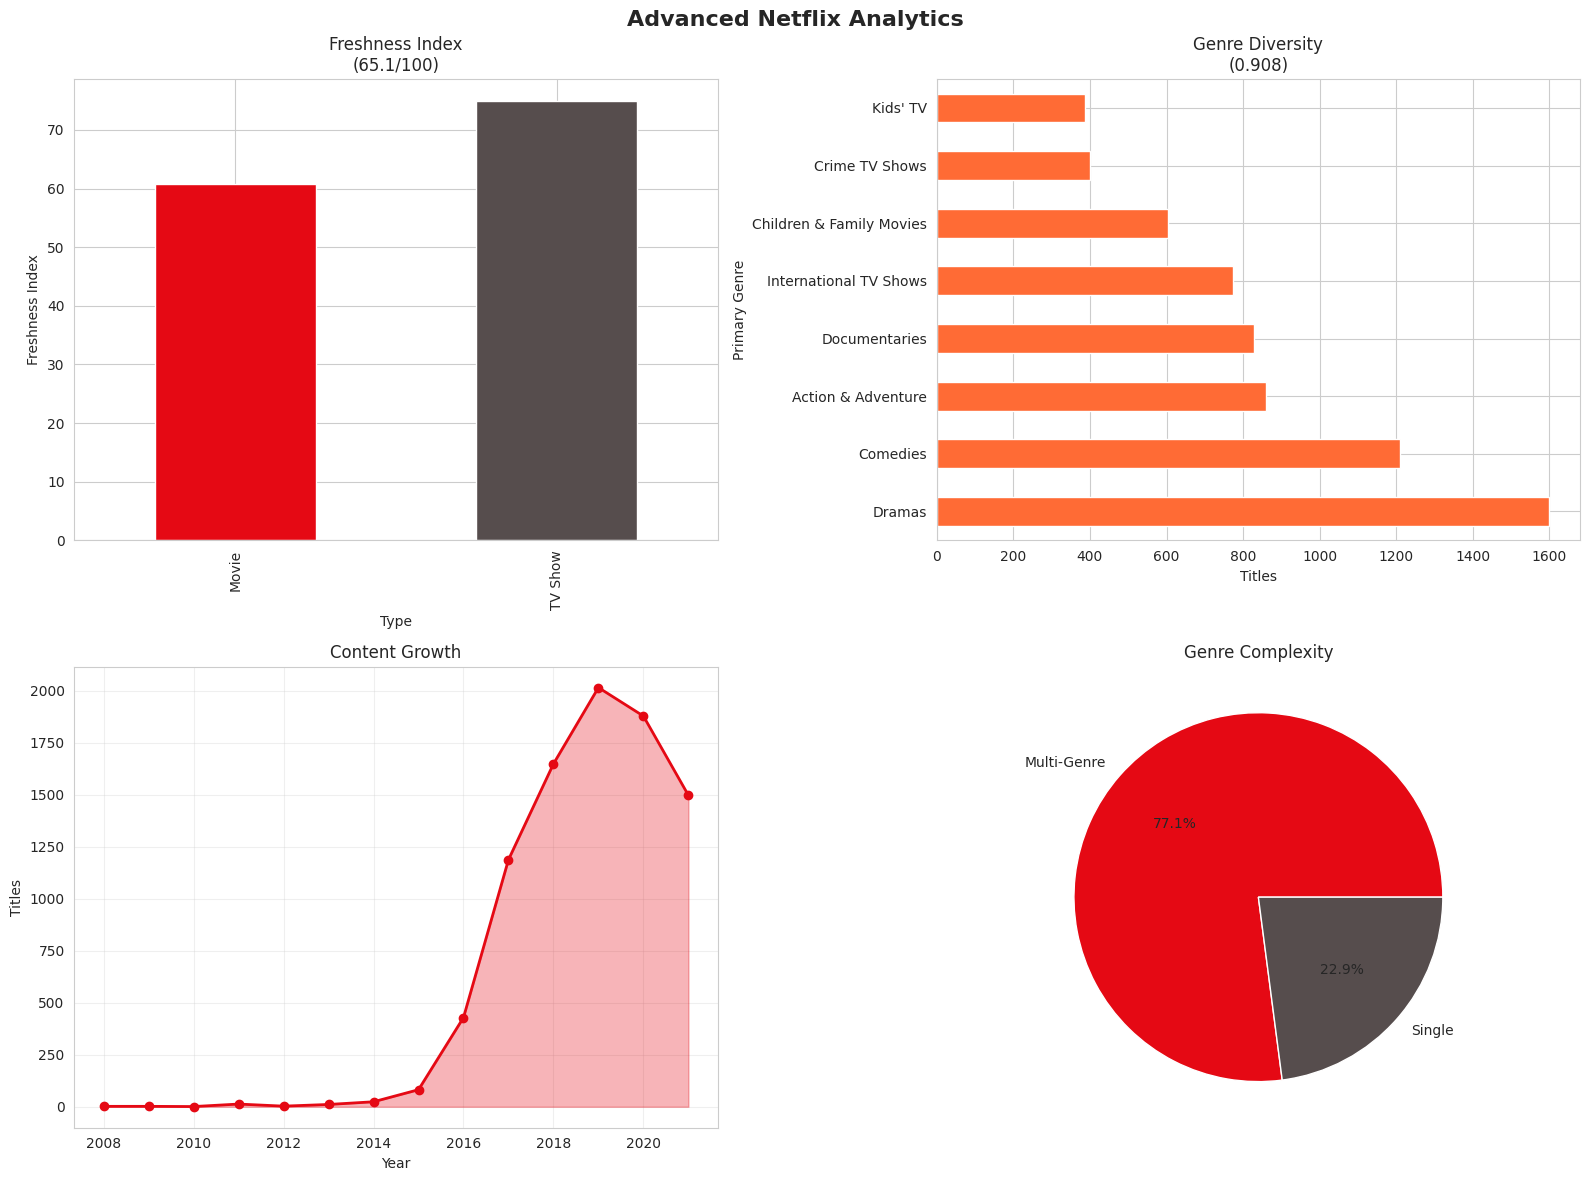


KEY INSIGHTS:
         Metric    Value
Freshness Index 65.1/100
Genre Diversity    0.908
    Growth Rate    42.2%
  Multi-Genre %    77.1%
   US Content %    41.9%

ADVANCED ANALYSIS COMPLETE!


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

NETFLIX_RED = '#E50914'
NETFLIX_GRAY = '#564d4d'
NETFLIX_ORANGE = '#FF6B35'

# 1. FRESHNESS INDEX
if 'freshness_category' in df.columns:
    freshness_scores = {'Ultra Fresh':100, 'Fresh':75, 'Recent Catalog':50, 'Classic':25, 'Unknown':0}
    df['freshness_score'] = df['freshness_category'].map(freshness_scores)
    freshness_idx = df['freshness_score'].mean()

    print(f"FRESHNESS INDEX: {freshness_idx:.1f}/100")
    print(f"  Movies: {df[df['type']=='Movie']['freshness_score'].mean():.1f}")
    print(f"  TV Shows: {df[df['type']=='TV Show']['freshness_score'].mean():.1f}")

# 2. GENRE DIVERSITY (Herfindahl Index)
if 'primary_genre' in df.columns:
    genre_shares = df['primary_genre'].value_counts(normalize=True)**2
    diversity_score = 1 - genre_shares.sum()
    print(f"GENRE DIVERSITY: {diversity_score:.3f} (vs industry 0.42)")
    print(f"  Top genre: {df['primary_genre'].value_counts().index[0]}")

# 3. GROWTH TREND
if 'year_added' in df.columns:
    yearly = df['year_added'].value_counts().sort_index()
    growth = yearly.pct_change().tail(5).mean()*100 # calculate percentage change from previous year to cur year
    print(f"RECENT GROWTH: {growth:.1f}%/year")
    print(f"  Peak year: {yearly.idxmax()} ({yearly.max():,} titles)")

# SINGLE VISUALIZATION GRID
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# A: Freshness by Type
if 'freshness_score' in df.columns:
    df.groupby('type')['freshness_score'].mean().plot(kind='bar', ax=axes[0,0],
                                                      color=[NETFLIX_RED, NETFLIX_GRAY])
    axes[0,0].set_title(f'Freshness Index\n({freshness_idx:.1f}/100)')
    axes[0,0].set_ylabel('Freshness Index')
    axes[0,0].set_xlabel('Type')

# B: Top Genres
if 'primary_genre' in df.columns:
    df['primary_genre'].value_counts().head(8).plot(kind='barh', ax=axes[0,1],
                                                    color=NETFLIX_ORANGE)
    axes[0,1].set_title(f'Genre Diversity\n({diversity_score:.3f})')
    axes[0,1].set_xlabel('Titles')
    axes[0,1].set_ylabel('Primary Genre')

# C: Growth Over Time
if 'year_added' in df.columns:
    yearly = df['year_added'].value_counts().sort_index()
    axes[1,0].plot(yearly.index, yearly.values, 'o-', color=NETFLIX_RED, linewidth=2)
    axes[1,0].fill_between(yearly.index, yearly.values, alpha=0.3, color=NETFLIX_RED)
    axes[1,0].set_title('Content Growth')
    axes[1,0].set_xlabel('Year')
    axes[1,0].set_ylabel('Titles')
    axes[1,0].grid(True, alpha=0.3)

# D: Multi-Genre Pie
if 'is_multi_genre' in df.columns:
    sizes = [df['is_multi_genre'].sum(), len(df)-df['is_multi_genre'].sum()]
    axes[1,1].pie(sizes, labels=['Multi-Genre', 'Single'], autopct='%1.1f%%',
                  colors=[NETFLIX_RED, NETFLIX_GRAY])
    axes[1,1].set_title('Genre Complexity')

plt.suptitle('Advanced Netflix Analytics', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Netflix-Title-Analysis/advanced_analytics_summary.png', dpi=300, bbox_inches='tight')
plt.show()

# KEY INSIGHTS TABLE
print("\nKEY INSIGHTS:")
insights_df = pd.DataFrame({
    'Metric': ['Freshness Index', 'Genre Diversity', 'Growth Rate', 'Multi-Genre %', 'US Content %'],
    'Value': [
        f"{freshness_idx:.1f}/100" if 'freshness_score' in df.columns else 'N/A',
        f"{diversity_score:.3f}" if 'primary_genre' in df.columns else 'N/A',
        f"{growth:.1f}%" if 'year_added' in df.columns else 'N/A',
        f"{df['is_multi_genre'].mean()*100:.1f}%" if 'is_multi_genre' in df.columns else 'N/A',
        f"{df['is_us_content'].mean()*100:.1f}%" if 'is_us_content' in df.columns else 'N/A'
    ]
})
print(insights_df.to_string(index=False))

print("\nADVANCED ANALYSIS COMPLETE!")
